In [3]:
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split

final_path = os.getcwd().split('\\')[0] + "\\"

for path in os.getcwd().split('\\')[1:-1]:
    final_path = os.path.join(final_path, path)


final_path = os.path.join(final_path, 'fashion_mnist_images')
final_path_train = os.path.join(final_path, 'train')
final_path_test = os.path.join(final_path, 'test')

print(final_path_train)


def load_data(size, path):

    x = []
    y = []

    for cls in os.listdir(path):
        for i, img in enumerate(os.listdir(os.path.join(path, cls))):
            x.append(np.array(Image.open(os.path.join(os.path.join(path, cls), img))))
            y.append(int(cls))
            if i >= size-1:
                break

    y = np.expand_dims(y, axis=-1)

    return np.array(x), np.array(y)

def flatten_picture(x):
    return np.array([[x_i[i,j] for i in range(len(x_i)) for j in range(len(x_i[0]))] for x_i in x])

def remake_picture(x, picture_size=28):
    return np.array([[[x_i[i*picture_size+j] for j in range(picture_size)] for i in range(picture_size)] for x_i in x])


classes_dict= {
    0:	'T-shirt/top',
    1:	'Trouser',
    2:	'Pullover',
    3:	'Dress',
    4:	'Coat',
    5:	'Sandal',
    6:	'Shirt',
    7:	'Sneaker',
    8:	'Bag',
    9:	'Ankle boot'
}


C:\Users\craci\DataSpellProjects\Adaptation_NNfs\fashion_mnist_images\train


In [4]:
x_train, y_train = load_data(500, final_path_train)

print(np.shape(x_train))
print(np.shape(y_train))

y_train = y_train.astype(np.int8)

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, shuffle=True, test_size=0.1)

print(np.shape(x_train))
print(np.shape(y_train))
print(np.shape(x_valid))
print(np.shape(y_valid))




(5000, 28, 28)
(5000, 1)
(4500, 28, 28)
(4500, 1)
(500, 28, 28)
(500, 1)


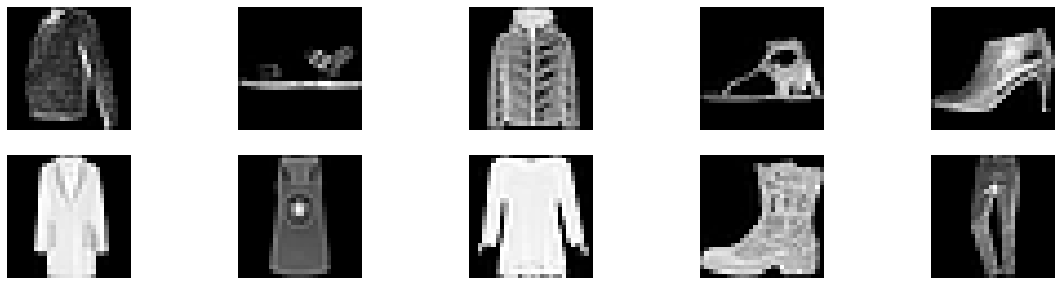

In [3]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,5))

for i in range(10):
    fig.add_subplot(2, 5, i+1) # first 2 params are the nr of img dim1 * dim2 and 3rd param is the image location
    plt.imshow(x_train[i], cmap='gray')
    plt.text(x=0, y = 31,s=classes_dict[y_train[i,0]], fontsize=15, color="white")
    plt.axis('off')



In [4]:
x_train_flatten = flatten_picture(x_train)
x_valid_flatten = flatten_picture(x_valid)

x_train_flatten = x_train_flatten.astype(np.float32)
x_valid_flatten = x_valid_flatten.astype(np.float32)

x_train_flatten /= 255
x_valid_flatten /= 255

input_size = x_train_flatten.shape[1]
output_size = np.max(y_train) + 1

print(input_size)
print(output_size)

print(np.shape(x_train_flatten))
print(np.shape(x_valid_flatten))

784
10
(4518, 784)
(502, 784)


In [5]:
uniquet, countst = np.unique(y_train, return_counts=True)
uniquev, countsv = np.unique(y_valid, return_counts=True)

print( dict(zip(uniquet, countst)))
print( dict(zip(uniquev, countsv)))


{0: 459, 1: 452, 2: 457, 3: 454, 4: 447, 5: 442, 6: 460, 7: 443, 8: 454, 9: 450}
{0: 43, 1: 50, 2: 45, 3: 48, 4: 55, 5: 60, 6: 42, 7: 59, 8: 48, 9: 52}


In [20]:
#_________________________________________________________________
#
#                   Keras Implementation
#
#_________________________________________________________________

from keras.layers import Dense, Input
from keras.models import Model
from keras.losses import sparse_categorical_crossentropy
from keras.optimizers import Adam
from keras.regularizers import l2

input_layer = Input((input_size, ))

d1 = Dense(512, kernel_regularizer=l2(5e-4), bias_regularizer=l2(5e-4), activation='relu')(input_layer)
d2 = Dense(512, kernel_regularizer=l2(5e-4), bias_regularizer=l2(5e-4), activation='relu')(d1)
output_layer = Dense(output_size, kernel_regularizer=l2(5e-4), bias_regularizer=l2(5e-4), activation='softmax')(d2)

moldel_keras = Model(inputs=input_layer, outputs=output_layer)
moldel_keras.compile(loss=sparse_categorical_crossentropy, optimizer=Adam(learning_rate=0.001))

moldel_keras.fit(x=x_train_flatten, y=y_train, batch_size=64, epochs=4, validation_data=(x_valid_flatten, y_valid))


Epoch 1/4
71/71 [==============================] - 1s 12ms/step - loss: 1.2989 - val_loss: 0.9323
Epoch 2/4
71/71 [==============================] - 1s 7ms/step - loss: 0.9187 - val_loss: 0.8781
Epoch 3/4
71/71 [==============================] - 0s 5ms/step - loss: 0.8288 - val_loss: 0.7406
Epoch 4/4
71/71 [==============================] - 0s 5ms/step - loss: 0.7472 - val_loss: 0.7651


In [14]:
%load_ext autoreload
%autoreload 2
from NNImplementation import BasicClasses as cls, ModelClassIntegration
from NNImplementation.ModelClassIntegration import Model

model_NNFS = Model()

model_NNFS.add_layer(cls.Layer(input_size, 512, l2_biases_regularization=5e-3, l2_weights_regularization=5e-3), trainable_layer=True)
model_NNFS.add_layer(cls.ActivationReLU())
model_NNFS.add_layer(cls.Layer(512,512,l2_biases_regularization=5e-3, l2_weights_regularization= 5e-3),trainable_layer=True)
model_NNFS.add_layer(cls.ActivationReLU())
model_NNFS.add_layer(cls.Layer(512, output_size), trainable_layer=True)
model_NNFS.add_layer(cls.ActivationSoftmax())

model_NNFS.set(optimizer=cls.OptimizerAdam(0.02, decay=5e-4, beta_2=0.999),
               loss=cls.CategoricalCrossEntropyLossFunction(),
               loss_softmax_merge=cls.CategoricalCrossEntropySoftmaxActivation())

model_NNFS.train(X=x_train_flatten, Y=y_train, batch_size=64, epochs=10,
                 print_every=1, X_validation=x_valid_flatten,
                 Y_validation=y_valid, regularization_loss_on=True)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
_____________________________________________
Epoch  0
Current loss is:  3.1921027848420667
Current validation loss is:  9.788495904387693
_____________________________________________
_____________________________________________
Epoch  1
Current loss is:  2.298696837364156
Current validation loss is:  8.462832354651995
_____________________________________________
_____________________________________________
Epoch  2
Current loss is:  1.947112846098258
Current validation loss is:  7.025761090805141
_____________________________________________
_____________________________________________
Epoch  3
Current loss is:  2.0343495065126347
Current validation loss is:  9.581644458996252
_____________________________________________
_____________________________________________
Epoch  4
Current loss is:  2.385403184570344
Current validation loss is:  9.161892037703328
____________________________________

In [21]:
x_test, y_test = load_data(100, final_path_test)

print(np.shape(x_test))
print(np.shape(y_test))

x_test_flatten = flatten_picture(x_test)
x_test_flatten = x_test_flatten.astype(np.float32)
x_test_flatten /= 255

print(np.shape(x_test_flatten))

predictions_model_NNFS = model_NNFS.forward(x_test_flatten)
predictions_model_keras = moldel_keras.predict(x_test_flatten)

#predictions_model_NNFS = np.argmax(predictions_model_NNFS, axis=-1)
#predictions_model_keras = np.argmax(predictions_model_keras, axis=-1)

# predictions_model_NNFS = np.expand_dims(predictions_model_NNFS, axis=-1)
# predictions_model_keras = np.expand_dims(predictions_model_keras, axis=-1)

print(np.shape(y_test))
print(np.shape(predictions_model_NNFS))
print(np.shape(predictions_model_keras))


(1020, 28, 28)
(1020, 1)
(1020, 784)
32/32 [==============================] - 0s 4ms/step
(1020, 1)
(1020, 10)
(1020, 10)


In [22]:
from keras.metrics import categorical_accuracy, sparse_categorical_accuracy

acc_NNFS = (sparse_categorical_accuracy(y_test, predictions_model_NNFS).numpy())
acc_keras = (sparse_categorical_accuracy(y_test, predictions_model_keras).numpy())



print(np.mean(acc_NNFS))
print(np.mean(acc_keras))

0.74607843
0.8215686


In [20]:
uniquep1, countsp1 = np.unique(predictions_model_NNFS, return_counts=True)
uniquep2, countsp2 = np.unique(predictions_model_keras, return_counts=True)

print( dict(zip(uniquep1, countsp1)))
print( dict(zip(uniquep2, countsp2)))



{0: 115, 1: 132, 2: 152, 3: 103, 4: 72, 5: 75, 6: 5, 7: 108, 8: 115, 9: 143}
{0: 126, 1: 100, 2: 147, 3: 96, 4: 63, 5: 90, 6: 77, 7: 119, 8: 106, 9: 96}


(1020, 28, 28)
(1020, 28, 28)


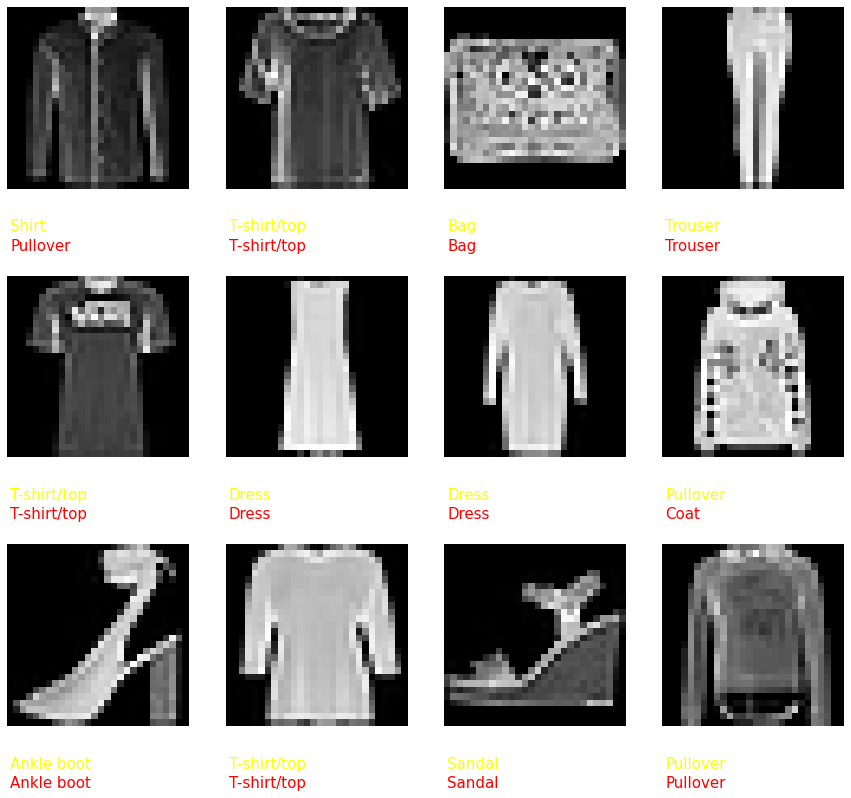

In [48]:
import matplotlib.pyplot as plt
from sklearn.utils import  shuffle

print(np.shape(x_test))

x_test, y_test, predictions_model_NNFS, predictions_model_keras = shuffle(x_test, y_test, predictions_model_NNFS, predictions_model_keras, random_state=0)

print(np.shape(x_test))

nr_of_images = 12

fig = plt.figure(figsize=(15,nr_of_images+2))

for i in range(nr_of_images):
    fig.add_subplot(nr_of_images/4, 4, i+1) # first 2 params are the nr of img dim1 * dim2 and 3rd param is the image location
    plt.imshow(x_test[i], cmap='gray')
    plt.text(x=0, y = 31,s=classes_dict[y_test[i,0]], fontsize=15, color="white")
    plt.text(x=0, y = 34,s=classes_dict[predictions_model_keras[i,0]], fontsize=15, color="yellow")
    plt.text(x=0, y = 37,s=classes_dict[predictions_model_NNFS[i,0]], fontsize=15, color="red")
    plt.axis('off')
